# <h1 align = 'center' style = 'color: #7FFF00;'>PROYECTO CODERHOUSE: LIGA PROFESIONAL DEL FÚTBOL ARGENTINO </h1>

## <h2 style = 'text-decoration: underline; color : #FFF8DC'>ABSTRACT:</h2> 
El dataset seleccionado es el de la Liga Profesional de Fútbol Argentino, en este dataset encontramos más de dos mil partidos entre los campeonatos 2015 hasta la actualidad detallando todas las estadísticas partido a partido. Entre estos datos encontramos valores de posesión de balón, goles, promedio de edad de cada equipo, valores de las apuestas en base a resultados y cómo pagaban estas según equipo, etc, que generan 33 columnas de información de la más variada que puede ser tomada en un partido de fútbol.
La búsqueda en este dataset será la de encontrar y analizar las tendencias generadas en base a las variables seleccionadas para determinar si respectivos acontencimientos dentro del marco deportivo pueden ser predecidos, o al menos tener un acceso a valores similares con el transcurso de tiempo así como también lograr un paneo general de la situación a nivel estadístico del fútbol profesional argentino en un marco de tiempo determinado(2015-2022).
Se apunta a una audiencia que le interese el ámbito tanto deportivo como lúdico, poder entender tal vez como funciona el sistema de apuestas respecto a determinadas tendencias dentro del fútbol argentino, y determinados comportamientos de apuestas que tienen los usuarios. Es decir, ver si son motivados por cuestiones estadísticas, tal vez de intuición, o meramente se rigen por nombres de clubes.
### <h3 style = 'color :#E9967A; text-decoration: underline'>Hipótesis:</h3> 
Una de las primeras hipótesis al momento de realizar un análisis de los datos brindados de un deporte determinado, en este caso el fútbol, es ver si hay una tendencia en base a los resultados respecto a si hay una mayor probabilidad de tener resultados favorables o positivos por localía; por otra parte tenemos una situación producto de un contexto macroeconómico como el que atraviesa Argentina donde el promedio de edad de los jugadores termina siendo cada vez menor debido a la gran salida que tienen estos a una edad cada vez más temprana.
Analizaremos también una situación de juego que durante los últimos diez años a sido tendencia, que es si el equipo que mayor posesión de pelota tiene es el que mayor victorias acumula. Asimísmo, derivado de la primera hipótesis podemos ver si condicen la tendencia de victorias locales con el sistema de apuestas.
### <h3 style = 'color:#E9967A; text-decoration: underline'>Preguntas a responder:</h3>
    1.¿El equipo local es quién mas victorias tiene?
    2.¿Cómo evolucionó la cantidad de goles de visitantes y locales en el transcurso del tiempo?
    3.¿Mayor posesión implica mejores resultados?
    4.¿Cómo varía el promedio de edad de los equipos según los torneos?¿Los resultados se ven afectados por esto?
    5.¿Qué resultados pagan más: locales, visitantes o empates?
    6.Tomando un equipo en particular: ¿Cómo se va modificando su valor de mercado?¿A menor valor, menores resultados?
### <h3 style = 'color:#E9967A; text-decoration: underline'>OBJETIVO:</h3>
El objetivo del proyecto es lograr generar un mejor entendimiento de las apuestas que se realizan dentro del marco deportivo en el fútbol argentino, en una base general lograr entender como se van dando los desarrollos deportivos y resultados dentro del marco de las apuestas que se van realizando a lo largo del período analizado. Una vez logrado esto, podemos también dilucidar si es posible desarrollar un modelo predictivo que nos acerque a resultados favorables respecto a los resultados, y donde podría estar la clave para maximizar los beneficios.
También en una cuestión netamente deportiva y sacando la cuestión lúdica, es que este sistema predictivo podría ayudar también a los equipos a analizar situaciones de juego como también un análisis más exhaustivo del comportamiento particular de cada equipo en diversas situaciones. Todo esto basado en los diferentes datos que se encuentran en el dataset seleccionado.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.impute import SimpleImputer

In [2]:
url='../Proyecto Final/afa_2015_2022_spa.csv'
df_afa = pd.read_csv(url, index_col=0)
df_afa.head()

,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
torneo,,,,,,,,,,,,,,,,,,,,,
Campeonato 2015,1,1,Velez,Aldosivi,2,0,NaN,NaN,NaN,NaN,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,NaN,NaN,NaN,NaN,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
Campeonato 2015,1,3,San Lorenzo,Colon,2,0,NaN,NaN,NaN,NaN,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,NaN,NaN,NaN,NaN,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,NaN,NaN,NaN,NaN,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15


In [4]:
print(df_afa.isnull().sum()) #Obtenemos la cantidad de datos nulos en nuestra base de datos

fecha                             0
partido                           0
equipo_local                      0
equipo_visitante                  0
goles_local                       0
goles_visitante                   0
posesion_local                 1325
tiros_arco_local               1325
intentos_local                 1325
faltas_local                   1325
tiro_esquina_local             1325
posesion_visitante             1325
tiros_arco_visitante           1325
intentos_visitante             1325
faltas_visitante               1325
tiro_esquina_visitante         1325
amarillas_local                1313
amarillas_visitante            1313
rojas_local                    1140
rojas_visitante                1140
valor_mercado_local               0
altura_media_local                0
edad_media_local                  0
proporcion_zurdos_local           0
valor_mercado_visitante           0
altura_media_visitante            0
edad_media_visitante              0
proporcion_zurdos_visitante 

In [5]:
df_afa1 = df_afa.fillna(df_afa.mean())
df_afa1.head()


C:\Users\saume\AppData\Local\Temp\ipykernel_18216\725839149.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_afa1 = df_afa.fillna(df_afa.mean())


,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
torneo,,,,,,,,,,,,,,,,,,,,,
Campeonato 2015,1,1,Velez,Aldosivi,2,0,51.115642,4.429144,13.676471,13.334893,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,51.115642,4.429144,13.676471,13.334893,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
Campeonato 2015,1,3,San Lorenzo,Colon,2,0,51.115642,4.429144,13.676471,13.334893,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,51.115642,4.429144,13.676471,13.334893,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,51.115642,4.429144,13.676471,13.334893,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15


<p style = 'color: #FAFAD2'>1.¿El equipo local es quién mas victorias tiene?</p>

In [6]:
local = 0
visitante = 0
empate = 0
for i in df_afa['resultado']:
    if i == 'L':
        local += 1
    elif i == 'V':
        visitante += 1
    else:
        empate += 1
print(f'La cantidad total de partidos: {local + visitante + empate}, donde hubo {local} victorias LOCALES, {visitante} victorias VISITANTES, {empate} EMPATES')

La cantidad total de partidos: 2821, donde hubo 1236 victorias LOCALES, 762 victorias VISITANTES, 823 EMPATES


Text(0.5, 0, 'Resultados')

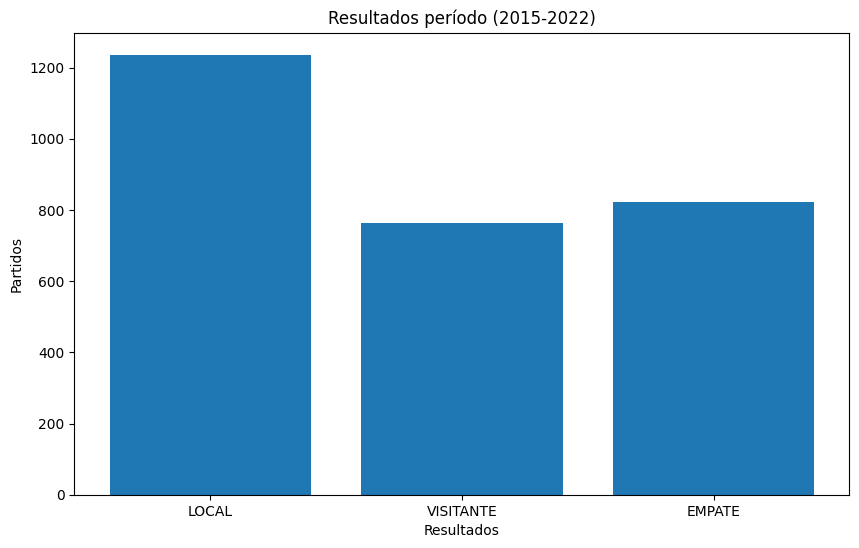

In [7]:
partidos = [local,visitante,empate]
resultados = ['LOCAL', 'VISITANTE','EMPATE']
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(resultados, partidos)
ax.set_title('Resultados período (2015-2022)')
ax.set_ylabel('Partidos')
ax.set_xlabel('Resultados')

<p style = 'color: #FF8C00'>Podemos ver mediante este primer gráfico de barras que el resultado que más se dio en el período estipulado de la totalidad de los partidos jugados es con una marcada tendencia para la victoria del equipo local. Por tanto, en una primera apreciación podemos ver como la hipótesis se estaría cumpliendo en la generalidad de los partidos en el transcurso del tiempo.</p>
<p style = 'color: #FF8C00'>Ahora veamos como se dan los mismos resultados pero buscando una particularidad, que es la manera en la que se comportan estos valores torneo a torneo</p>

In [3]:
def resultados_liga(df):
    local = 0
    visitante = 0
    empate = 0
    for i in df['resultado']:
        if i == 'L':
            local += 1
        elif i == 'V':
            visitante += 1
        else:
            empate += 1
    resultados = [local,visitante,empate]
    return resultados

In [4]:
torneo = np.array(df_afa.index.drop_duplicates())
partidos = []
for i in torneo:
    df = df_afa.loc[i:i]
    partidos.append(resultados_liga(df))
partidos
data = {'Torneo': torneo, 
        'Local':[partidos[0][0],partidos[1][0],partidos[2][0],partidos[3][0],partidos[4][0],partidos[5][0],partidos[6][0],partidos[7][0]],
        'Visitante':[partidos[0][1],partidos[1][1],partidos[2][1],partidos[3][1],partidos[4][1],partidos[5][1],partidos[6][1],partidos[7][1]],
        'Empate':[partidos[0][2],partidos[1][2],partidos[2][2],partidos[3][2],partidos[4][2],partidos[5][2],partidos[6][2],partidos[7][2]]
        }
data = pd.DataFrame(data)
data

,Torneo,Local,Visitante,Empate
0,Campeonato 2015,188,122,140
1,Transicion 2016,116,54,70
2,Campeonato 2016/17,199,132,119
3,Campeonato 2017/18,168,105,105
4,Campeonato 2018/19,141,82,102
5,Superliga 2019/20,117,83,76
6,Campeonato 2021,143,86,96
7,Campeonato 2022,164,98,115


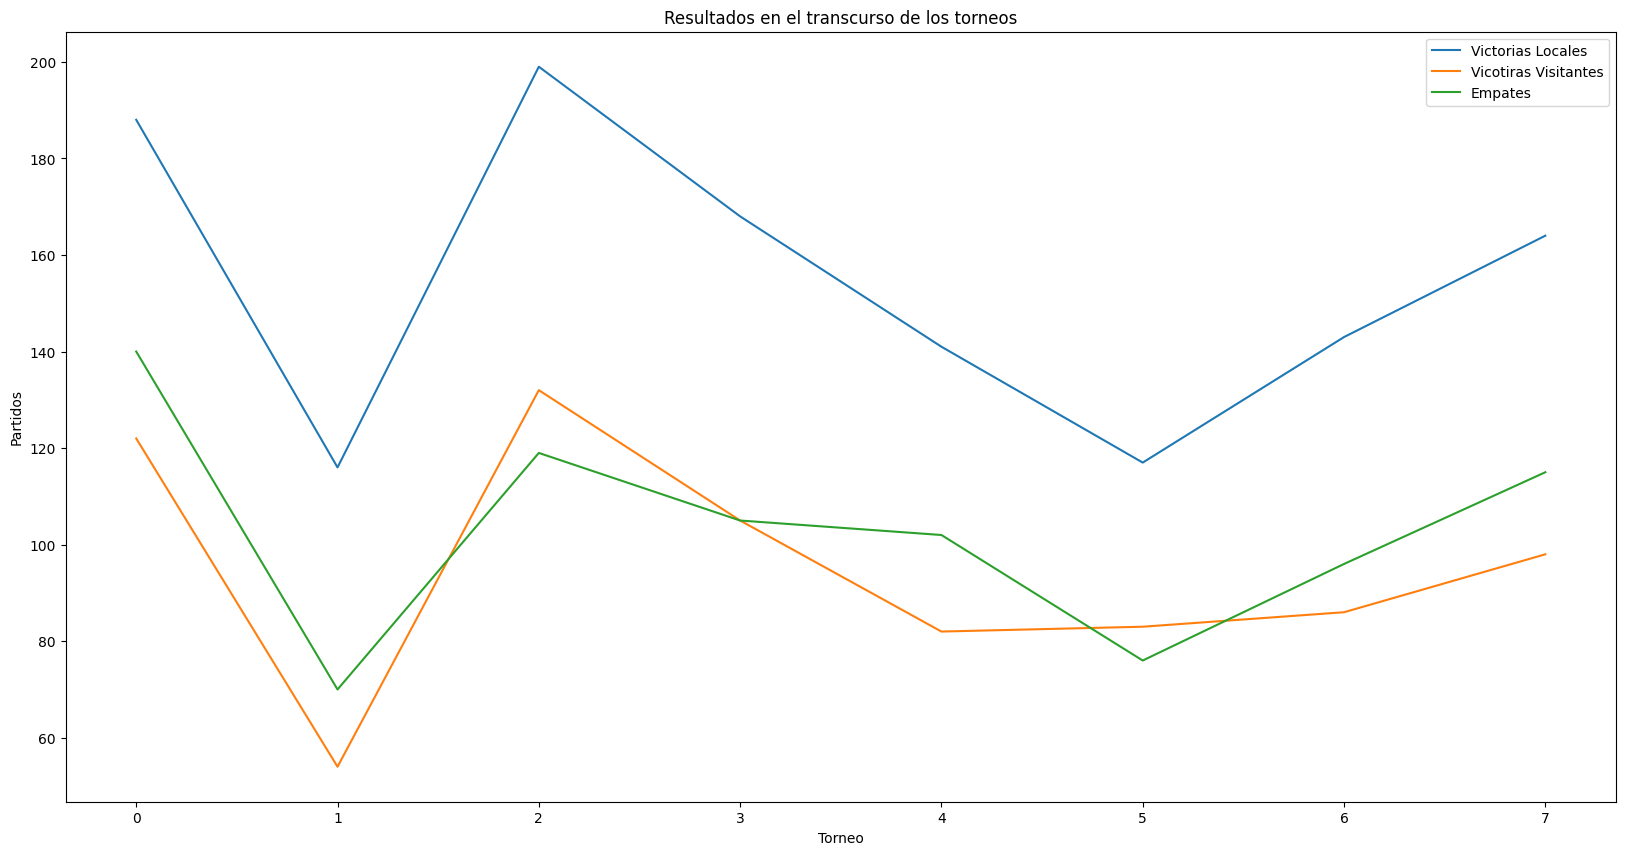

In [8]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(data['Local'], label='Victorias Locales')
ax.plot(data['Visitante'], label='Vicotiras Visitantes')
ax.plot(data['Empate'], label='Empates')
ax.set_xlabel('Torneo')                  
ax.set_ylabel('Partidos')
ax.set_title('Resultados en el transcurso de los torneos')
ax.legend() 

<p style = 'color: #FF8C00'>Como podemos observar en las lineas obtenidas se sostiene la tendencia de que los equipos que disputan sus encuentros de local tienen mayor predisposición a obtener la victoria, mientras que también podemos notar que a medida que se fueron jugando los diferentes torneos hubo un cambio en la tendencia del empate que terminó por superar a las victorias visitantes.</p>
<p style = 'color: #FAFAD2'>2.¿Cómo evolucionó la cantidad de goles de visitantes y locales en el transcurso del tiempo?</p>


In [9]:
goles_visitante = df_afa['goles_visitante'].sum()
goles_local = df_afa['goles_local'].sum()
print(f'Total de GOLES LOCALES: {goles_local}, Total de GOLES VISITANTES: {goles_visitante}')

Total de GOLES LOCALES: 3646, Total de GOLES VISITANTES: 2795


In [10]:
def goles(df):
    local = 0
    visitante = 0
    for i in df['goles_local']:
        local += i
    for j in df['goles_visitante']:
        visitante += j  
    resultados = [local,visitante]
    return resultados

In [11]:
goles_campeonato = []
for i in torneo:
    df = df_afa.loc[i:i]
    goles_campeonato.append(goles(df))
goles_campeonato
data = {'Torneo': torneo,
        'Goles Locales': [goles_campeonato[0][0],goles_campeonato[1][0],goles_campeonato[2][0],goles_campeonato[3][0],goles_campeonato[4][0],goles_campeonato[5][0],goles_campeonato[6][0],goles_campeonato[7][0]],
        'Goles Visitantes' : [goles_campeonato[0][1],goles_campeonato[1][1],goles_campeonato[2][1],goles_campeonato[3][1],goles_campeonato[4][1],goles_campeonato[5][1],goles_campeonato[6][1],goles_campeonato[7][1]]
        }
data = pd.DataFrame(data)
data

,Torneo,Goles Locales,Goles Visitantes
0,Campeonato 2015,567,427
1,Transicion 2016,352,249
2,Campeonato 2016/17,562,462
3,Campeonato 2017/18,489,365
4,Campeonato 2018/19,406,313
5,Superliga 2019/20,342,289
6,Campeonato 2021,462,334
7,Campeonato 2022,466,356


<p style = 'color: #FF8C00'>En este primer gráfico lo que se va a mostrar es simplemente un comparativo entre goles locales y visitantes que se produjeron en los diferentes torneos dentro del marco temporal que nos encontramos analizando (2015-2022). Como parte de nuestra hipótesis inicial donde indicamos que hay una tendencia a que el equipo local es quien posee más chances de llevarse la victoria, la gráfica que aquí queremos mostrar debería continuar de alguna manera con esta tendencia.</p>

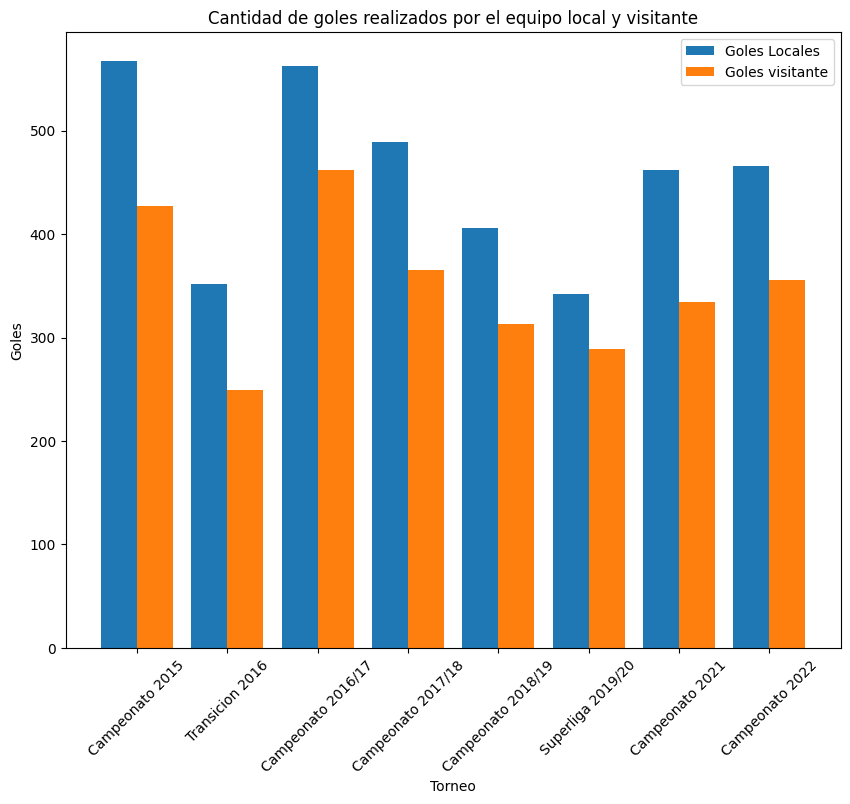

In [17]:
co = np.arange(len(data['Goles Locales']))
an = 0.40
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(co- an/2,data['Goles Locales'],an, label= 'Goles Locales')
ax.bar(co + an/2,data['Goles Visitantes'],an, label = 'Goles visitante')
ax.set_title('Cantidad de goles realizados por el equipo local y visitante')
ax.set_ylabel('Goles')
ax.set_xlabel('Torneo')
plt.xticks([0,1,2,3,4,5,6,7], ["Campeonato 2015", "Transicion 2016", "Campeonato 2016/17", "Campeonato 2017/18","Campeonato 2018/19","Superliga 2019/20",
                               "Campeonato 2021","Campeonato 2022"])
plt.xticks(rotation=45)
ax.legend()

<p style = 'color: #FF8C00'>Vemos como la tendencia de victorias del equipo local dentro del período analizado se condice en un panorama general al ver que por cada torneo hay mayor cantidad de goles anotados por el equipo local que por el visitante, esto implica que de alguna manera los valores se condicen en sus primeras instancias con la hipótesis planteada.</p>
<p style = 'color: #FAFAD2'>3.¿Mayor posesión implica mejores resultados?</p>

In [14]:
#Vamos a tener que recortar en este caso el periodo de campeonatos para profundizar respecto a la posesión debido a la falta de datos en algunos torneos.
resultado = df_afa['resultado'].loc['Campeonato 2018/19':]
posesion_local = df_afa['posesion_local'].loc['Campeonato 2018/19':]
posesion_visitante = df_afa['posesion_visitante'].loc['Campeonato 2018/19':]
posesion = {'Posesion Local': posesion_local,
            'Posesion Visitante' : posesion_visitante,
            'Resultado' : resultado}
posesion = pd.DataFrame(posesion)
posesion

,Posesion Local,Posesion Visitante,Resultado
torneo,,,
Campeonato 2018/19,46.0,54.0,L
Campeonato 2018/19,52.0,48.0,E
Campeonato 2018/19,33.0,67.0,L
Campeonato 2018/19,50.0,50.0,L
Campeonato 2018/19,45.0,55.0,E
...,...,...,...
Campeonato 2022,48.0,52.0,L
Campeonato 2022,55.0,45.0,E
Campeonato 2022,62.0,38.0,E


In [15]:
victorias_posesion = 0
otras_victorias = 0
empates = 0
j = 0
for i in posesion['Resultado']:
    if i == 'L' and posesion['Posesion Local'][j] > posesion['Posesion Visitante'][j]:
        victorias_posesion += 1
    elif i == 'V' and posesion['Posesion Local'][j] < posesion['Posesion Visitante'][j]:
        victorias_posesion += 1
    else:
        if i == 'V' or i == 'L':
            otras_victorias += 1
        else:
            empates += 1        
    j += 1
print(f'La cantidad de victorias que tiene un equipo con mayor posesion es de: {victorias_posesion}, quienes ganaron sin mayor posesión: {otras_victorias} , y el resto que empató: {empates}')

La cantidad de victorias que tiene un equipo con mayor posesion es de: 372, quienes ganaron sin mayor posesión: 542 , y el resto que empató: 389


               Resultados  Total
0  Victorias por Posesión    372
1         Otras Victorias    542
2                 Empates    389


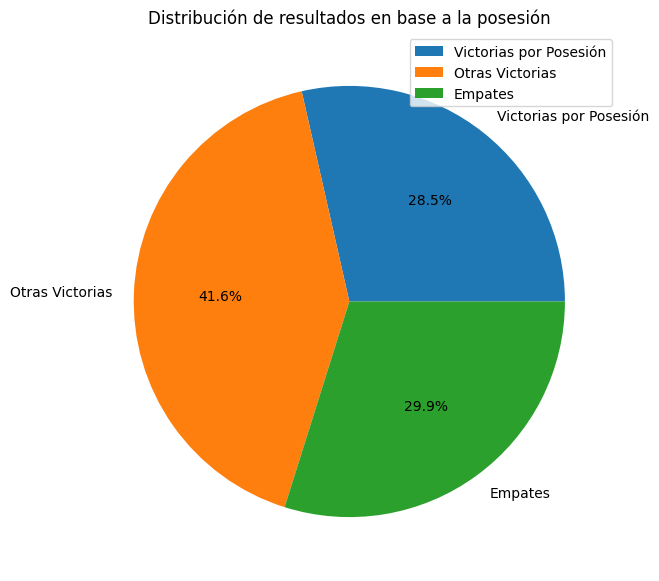

In [16]:
juego_posesion = {
    'Resultados': ['Victorias por Posesión','Otras Victorias','Empates'],
    'Total': [victorias_posesion,otras_victorias,empates]
}
juego_posesion = pd.DataFrame(juego_posesion)
print(juego_posesion)
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(juego_posesion.Total, labels = juego_posesion.Resultados,autopct='%1.1f%%')
ax.set_title('Distribución de resultados en base a la posesión')
ax.legend()

<p style = 'color: #FF8C00'>A través de este gráfico a pesar de que el tiempo entre los torneos se vea acotado, podemos analizar que el factor posesión en términos de porcentajes de victorias alcanzadas no representa un valor relevante al momento de definir el marcador.</p>
<p style = 'color: #FAFAD2'>4.¿Cómo varía el promedio de edad de los equipos según los torneos?¿Los resultados se ven afectados por esto?</p>

In [17]:
promedio_edad_local = df_afa.groupby(df_afa.index).mean(['edad_media_local'])
edad_local = promedio_edad_local['edad_media_local'].round(0)
promedio_edad_visitante = df_afa.groupby(df_afa.index).mean(['edad_media_visitante'])
edad_visitante = promedio_edad_visitante['edad_media_visitante'].round(0)
edades_campeonatos = {
    'Promedio Local':edad_local,
    'Promedio Visitante' : edad_visitante
}
edades_campeonatos = pd.DataFrame(edades_campeonatos)
edades_campeonatos

,Promedio Local,Promedio Visitante
torneo,,
Campeonato 2015,25.0,25.0
Campeonato 2016/17,26.0,26.0
Campeonato 2017/18,26.0,26.0
Campeonato 2018/19,26.0,26.0
Campeonato 2021,25.0,25.0
Campeonato 2022,25.0,25.0
Superliga 2019/20,25.0,25.0
Transicion 2016,26.0,26.0


<p style = 'color: #FF8C00'>A simple vista y sin necesidad de obtener ningún gráfico podemos desestimar la hipótesis entorno a las edades del fútbol argentino dentro del período establecido para su análisis.</p>
<p style = 'color: #FAFAD2'>5.¿Qué resultados pagan más: locales, visitantes o empates?</p>


In [18]:
df_apuestas = {
    'Apuesta Local': df_afa['apuesta_local'],
    'Apuesta Visitante': df_afa['apuesta_visitante'],
    'Apuesta Empate': df_afa['apuesta_empate'],
    'Resultado del Partido': df_afa['resultado'],
}
df_apuestas = pd.DataFrame(df_apuestas)
df_apuestas.head()

,Apuesta Local,Apuesta Visitante,Apuesta Empate,Resultado del Partido
torneo,,,,
Campeonato 2015,1.75,5.01,3.37,L
Campeonato 2015,1.80,4.82,3.23,V
Campeonato 2015,1.70,5.55,3.34,L
Campeonato 2015,2.06,3.82,3.09,V
Campeonato 2015,2.03,3.82,3.15,E


In [19]:
promedio_apuesta_local = df_apuestas.groupby(df_apuestas.index).mean('Apuesta Local')
promedio_apuesta_local = promedio_apuesta_local['Apuesta Local']
promedio_apuesta_visitante = df_apuestas.groupby(df_apuestas.index).mean('Apuesta Visitante')
promedio_apuesta_visitante = promedio_apuesta_visitante['Apuesta Visitante']
promedio_apuesta_empate = df_apuestas.groupby(df_apuestas.index).mean('Apuesta Empate')
promedio_apuesta_empate = promedio_apuesta_empate['Apuesta Empate']
promedios_apuestas = {
    'Promedio Apuesta Local': promedio_apuesta_local,
    'Promedio Apuesta Visitante' : promedio_apuesta_visitante,
    'Promedio Apauesta Empate' : promedio_apuesta_empate
}
promedios_apuestas = pd.DataFrame(promedios_apuestas)
promedios_apuestas.head()

,Promedio Apuesta Local,Promedio Apuesta Visitante,Promedio Apauesta Empate
torneo,,,
Campeonato 2015,2.391741,4.015379,3.223281
Campeonato 2016/17,2.331667,4.061089,3.279200
Campeonato 2017/18,2.380635,4.166746,3.370397
Campeonato 2018/19,2.428951,3.948704,3.187037
Campeonato 2021,2.536923,3.525385,3.337446


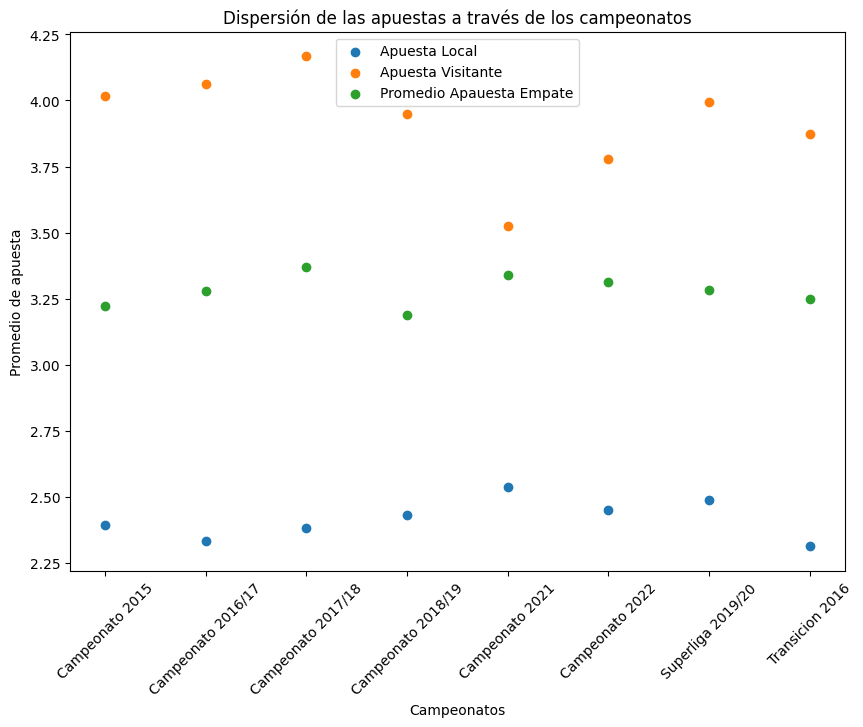

In [20]:
torneos = promedios_apuestas.index
apuesta_local = promedios_apuestas.loc[:,'Promedio Apuesta Local']
apuesta_visitante = promedios_apuestas.loc[:,'Promedio Apuesta Visitante']
apuesta_empate = promedios_apuestas.loc[:,'Promedio Apauesta Empate']
plt.figure(figsize=(10,7))
plt.scatter(torneos, apuesta_local, label="Apuesta Local")
plt.scatter(torneos, apuesta_visitante, label="Apuesta Visitante")
plt.scatter(torneos, apuesta_empate, label="Promedio Apauesta Empate")

plt.xlabel('Campeonatos')
plt.ylabel('Promedio de apuesta')
plt.title('Dispersión de las apuestas a través de los campeonatos')
plt.xticks(rotation = 45)
plt.legend()
plt.show()



<p style = 'color: #FF8C00'>Como se ve en este gráfico de dispersión a través del tiempo la apuesta que más paga es la del equipo visitante por lo que estaría yendo en pos de la hipótesis que hay una mayor probabilidad de que el equipo local gane y por eso en las apuestas a lo largo de los campeonatos sea menor paga si se apuesta al local.</p>
<p style = 'color: #ADFF2F'>En este caso, la mejor opción para reducir la dimensionalidad del dataset será la selección de características basada en el algoritmo de filtrado de correlación. De esta manera deberíamos poder identificar y eliminar las variables que tienen una correlación alta entre sí, lo que permite reducir el número de variables sin comprometer la calidad de los resultados de los modelos.</p>
<p style = 'color: #ADFF2F'>En este caso, la mejor opción va a ser elegir un algoritmo de árbol de decisión. Los arboles de decisioón nos llevará a generar un algoritmo de aprendizaje supervisado que se va a utilizar para la clasificación y la regresión.</p>

In [21]:
df_afa1.columns[:]

Index(['fecha', 'partido', 'equipo_local', 'equipo_visitante', 'goles_local',
       'goles_visitante', 'posesion_local', 'tiros_arco_local',
       'intentos_local', 'faltas_local', 'tiro_esquina_local',
       'posesion_visitante', 'tiros_arco_visitante', 'intentos_visitante',
       'faltas_visitante', 'tiro_esquina_visitante', 'amarillas_local',
       'amarillas_visitante', 'rojas_local', 'rojas_visitante',
       'valor_mercado_local', 'altura_media_local', 'edad_media_local',
       'proporcion_zurdos_local', 'valor_mercado_visitante',
       'altura_media_visitante', 'edad_media_visitante',
       'proporcion_zurdos_visitante', 'resultado', 'fecha_encuentro',
       'apuesta_local', 'apuesta_visitante', 'apuesta_empate'],
      dtype='object')

In [22]:
df_afa1.describe()

,fecha,partido,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,tiro_esquina_local,posesion_visitante,...,altura_media_local,edad_media_local,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,apuesta_local,apuesta_visitante,apuesta_empate
count,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,...,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000,2821.000000
mean,13.586671,7.486707,1.292449,0.990783,51.115642,4.429144,13.676471,13.334893,5.392380,48.884358,...,1.789969,25.385380,0.228336,35.810429,1.789979,25.382698,0.228515,2.411806,3.932789,3.281011
std,7.874324,4.066589,1.126050,1.038575,7.855454,1.626083,3.451765,2.920897,2.064275,7.855454,...,0.011158,1.164381,0.051016,30.937508,0.011106,1.168756,0.051082,0.863604,1.839734,0.476646
min,1.000000,1.000000,0.000000,0.000000,21.000000,0.000000,1.000000,3.000000,0.000000,18.000000,...,1.757317,22.698113,0.093023,4.400000,1.757317,22.698113,0.093023,1.140000,1.260000,2.060000
25%,7.000000,4.000000,0.000000,0.000000,50.000000,4.000000,13.000000,13.000000,5.000000,48.000000,...,1.781860,24.644444,0.190476,14.925000,1.781860,24.608696,0.190476,1.850000,2.720000,3.000000
50%,13.000000,7.000000,1.000000,1.000000,51.115642,4.429144,13.676471,13.334893,5.392380,48.884358,...,1.789250,25.292683,0.230769,25.200000,1.789250,25.292683,0.230769,2.220000,3.490000,3.140000
75%,20.000000,11.000000,2.000000,2.000000,52.000000,4.429144,13.676471,14.000000,5.392380,50.000000,...,1.797600,26.085106,0.264151,46.425000,1.797600,26.085106,0.264151,2.770000,4.550000,3.390000
max,30.000000,15.000000,8.000000,6.000000,82.000000,13.000000,31.000000,27.000000,16.000000,79.000000,...,1.819211,28.523810,0.365385,201.050000,1.819211,28.523810,0.365385,11.250000,17.970000,7.670000


In [23]:
df_afa1 = df_afa1.fillna(df_afa1.median())
df_afa1.head()

C:\Users\saume\AppData\Local\Temp\ipykernel_18216\2802814262.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_afa1 = df_afa1.fillna(df_afa1.median())


,fecha,partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local,tiros_arco_local,intentos_local,faltas_local,...,proporcion_zurdos_local,valor_mercado_visitante,altura_media_visitante,edad_media_visitante,proporcion_zurdos_visitante,resultado,fecha_encuentro,apuesta_local,apuesta_visitante,apuesta_empate
torneo,,,,,,,,,,,,,,,,,,,,,
Campeonato 2015,1,1,Velez,Aldosivi,2,0,51.115642,4.429144,13.676471,13.334893,...,0.301887,8.725,1.790370,28.100000,0.233333,L,2015-02-13 18:00:00,1.75,5.01,3.37
Campeonato 2015,1,2,Racing Club,Rosario Central,0,1,51.115642,4.429144,13.676471,13.334893,...,0.297297,18.350,1.789333,25.608696,0.217391,V,2015-02-13 21:10:00,1.80,4.82,3.23
Campeonato 2015,1,3,San Lorenzo,Colon,2,0,51.115642,4.429144,13.676471,13.334893,...,0.285714,12.125,1.801026,24.948718,0.282051,L,2015-02-14 17:00:00,1.70,5.55,3.34
Campeonato 2015,1,4,Gimnasia (LP),Def y Justicia,0,1,51.115642,4.429144,13.676471,13.334893,...,0.227273,12.050,1.776889,25.460000,0.240000,V,2015-02-14 17:00:00,2.06,3.82,3.09
Campeonato 2015,1,5,Godoy Cruz,San Martin (SJ),1,1,51.115642,4.429144,13.676471,13.334893,...,0.226415,11.250,1.780000,26.153846,0.205128,E,2015-02-14 19:15:00,2.03,3.82,3.15


In [24]:
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
#Voy a reemplazar los valores faltantes de las fechas de encuentro que no tengan datos por su inmediato consecutivo anterior
df_afa1['fecha_encuentro'] = pd.to_datetime(df_afa1['fecha_encuentro'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_afa1['fecha_encuentro'] = df_afa1['fecha_encuentro'].fillna(method='ffill')
#Acá corroboro que no quede ninguna fecha nula
df_afa1['fecha_encuentro'].isnull().sum()
# convierto a datetime y extraigo timestamp
df_afa1['fecha_encuentro'] = pd.to_datetime(df_afa1['fecha_encuentro'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df_afa1['timestamp'] = df_afa1['fecha_encuentro'].apply(lambda x: x.timestamp())
# reemplazo valores nulos por la fecha media del conjunto de datos
mean_timestamp = df_afa1['timestamp'].mean()
df_afa1['timestamp'] = df_afa1['timestamp'].fillna(mean_timestamp)
# conversión timestamp a datetime
df_afa1['fecha_encuentro_imputada'] = df_afa1['timestamp'].apply(lambda x: datetime.fromtimestamp(x))
# elimino columna timestamp
df_afa1 = df_afa1.drop('timestamp', axis=1)

In [25]:
# se crea un diccionario de mapeo de etiquetas categóricas a etiquetas numéricas
mapping = {'L': 0, 'V': 1, 'E': 2}
# creación de una nueva columna con las etiquetas numéricas correspondientes
df_afa1['resultado_num'] = df_afa['resultado'].map(mapping)
# Creación un objeto LabelEncoder
le = LabelEncoder()
# Convierte la columna "equipo_local" en valores numéricos
df_afa1["equipo_local"] = le.fit_transform(df_afa["equipo_local"])
df_afa1["equipo_visitante"] = le.fit_transform(df_afa["equipo_visitante"])

In [26]:
df_afa1.head()
print(df_afa1['fecha_encuentro_imputada'].dtype)

datetime64[ns]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [30]:
df_afa_training = df_afa1.drop(['fecha_encuentro_imputada','fecha_encuentro'],axis=1)
X = df_afa_training.drop(['resultado', 'resultado_num'], axis=1)
y = df_afa_training['resultado_num']
# se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# aquí entrenamos el modelo de clasificación utilizando los datos de entrenamiento
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
profundidad = clf.get_depth()
clf = DecisionTreeClassifier(max_depth=5)
y_train, y_test = y_train, y_test
# entrenar un modelo de clasificación utilizando los datos de entrenamiento
clf.fit(X_train, y_train)
# hacer predicciones sobre los datos de prueba
y_pred = clf.predict(X_test)
# evaluar la precisión del modelo utilizando una matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[125   0   0]
 [  0  77   1]
 [  0   0  80]]


<p style = 'color: #ADFF2F'>Utilizamos la matriz de confusión para poder evaluar el rendimiento del modelo de clasificacón al comparar las etiquetas predichas con las etiquetas verdaderas. Particularmente en el caso evaluado tenemos que la matriz de confusión muestra que el modelo predijo correctamente todos los 125 casos de la clase denominada como valor postivo verdadero, todos los 77 casos de la clase denominada valor negativo verdadero, y solo un caso de la clase que es denominada falso negativo.</p>
<p style = 'color: #ADFF2F'>Podemos concluir que el modelo de árbol de decisión entrenado tiene un rendimiento muy alto en la predicción de los casos de las clases Valor Positivo Verdadero y Valor Negativo Verdadero, con una precisión del 100% en ambos casos, lo cual es muy bueno. Sin embargo, el modelo tuvo dificultades en predecir los casos de la clase Falso Negativo, con una tasa de error del 1.2% (1 caso mal clasificado de un total de 81).</p>

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, y_pred, average='macro')
print("Precision:", precision)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)
f1 = f1_score(y_test, y_pred, average='macro')
print("F1-Score:", f1)

Accuracy: 0.9964664310954063
Precision: 0.9958847736625515
Recall: 0.9957264957264957
F1-Score: 0.9957790689908502


<p style= 'color: #ADFF2F'>Con los resultados obtenidos, se puede decir que el modelo tiene una muy alta precisión y rendimiento general para la clasificación de los datos de prueba. La precisión (accuracy) es de 0.996, que estaría indicando que el 99.6% de las predicciones del modelo son correctas. La precisión (precision) es de 0.996, lo que significa que cuando el modelo predice un partido como victoria o empate, es correcto en el 99.5% de las veces. Y lo mismo con el recall que es de 0.996, que significa que el modelo identifica correctamente el 99.5% de los partidos que realmente son victorias o empates.</p>
<p style = 'color: #ADFF2F'>Finalmente, el F1-Score es de 0.996, que es una medida ponderada de la precisión y el recall que es una medida que combina la precisión y el recall en un solo número para proporcionar una evaluación más general del rendimiento del modelo. Por lo tanto, podemos ver que los resultados sugieren que el modelo es muy preciso y que en su defecto podría ser útil para predecir los resultados de partidos de la liga de futbol argentino.</p>

In [43]:
from sklearn.metrics import r2_score
# Obtención de aptitud del modelo
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación (R^2): {:.4f}'.format(r2))

Coeficiente de determinación (R^2): 0.9949


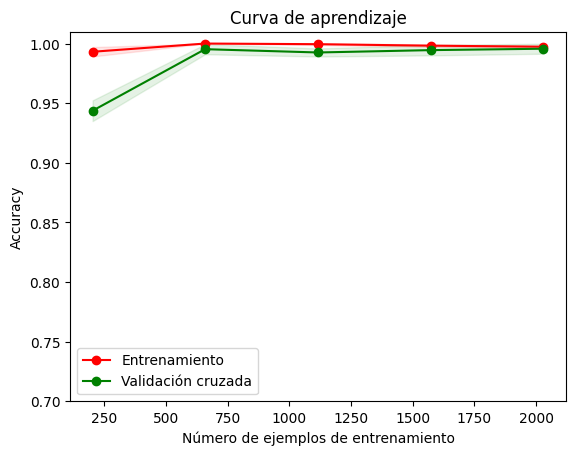

In [47]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(clf,X_train, y_train, cv=5, train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Curva de aprendizaje")
plt.xlabel("Número de ejemplos de entrenamiento")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.01)
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validación cruzada")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.legend(loc="best")
plt.show()